In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Read data from CSV file
data = pd.read_csv('iris.csv')

In [4]:
# Extract features (excluding species column)
features = data.drop('Species', axis=1)

In [6]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

In [7]:
# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

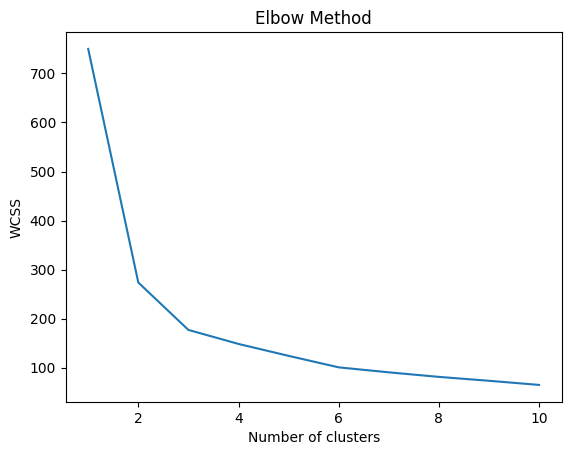

In [8]:
# Plotting the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

In [9]:
# From the graph, we can see that the optimal number of clusters is 3
# Now let's perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_clusters = kmeans.fit_predict(data_scaled)

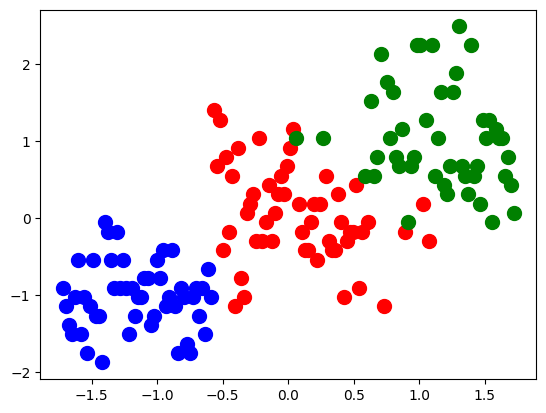

In [10]:
# Visualizing the clusters
plt.scatter(data_scaled[pred_clusters == 0, 0], data_scaled[pred_clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_scaled[pred_clusters == 1, 0], data_scaled[pred_clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_scaled[pred_clusters == 2, 0], data_scaled[pred_clusters == 2, 1], s=100, c='green', label='Cluster 3')

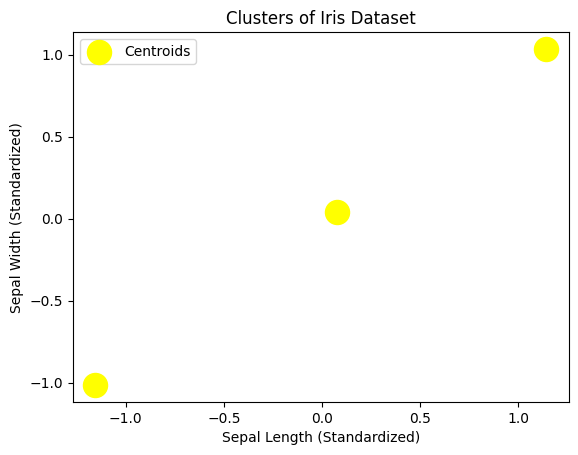

In [11]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.legend()
plt.show()
